In [ ]:
from PIL import Image
import numpy as np
img = Image.open('mouse.jpg')
X = np.array(img, dtype=np.float32)
RGB = [X[:,:,0],X[:,:,1],X[:,:,2]]
Ur, Sr, Rr = np.linalg.svd(RGB[0], full_matrices=False)
Ug, Sg, Rg = np.linalg.svd(RGB[1], full_matrices=False)
Ub, Sb, Rb = np.linalg.svd(RGB[2], full_matrices=False)

In [ ]:
print('Размер изображения с учётом цветов:',X.shape)
import os
cat_size = os.path.getsize(f'mouse.jpg')
print('Размер исходного файла: {:.2f}'.format(cat_size/1024), 'Кбайт')

Размер изображения с учётом цветов: (1280, 1140, 3)
Размер исходного файла: 245.27 Кбайт


In [ ]:
def new(U,S,R,r):
  D = np.hstack((S[:r],np.zeros(len(S)-r)))
  A = U.dot(np.diag(D)).dot(R)
  return A

def pict(Red,Green,Blue,r):
  Red = new(Ur,Sr,Rr,r)
  Green = new(Ug,Sg,Rg,r)
  Blue = new(Ub,Sb,Rb,r)
  CAT = np.vstack((Red.flatten(),Green.flatten(),Blue.flatten())).T.reshape(X.shape)
  CAT = Image.fromarray(np.asarray(CAT, dtype=np.uint8))
  return CAT

CATS = {}
Sings = [1,2,10,30,100,1000]
for r in Sings:
  CAT = pict(Red,Green,Blue,r)
  CAT.save(f'cat{r}.jpg')
  CATS[r] = CAT

In [ ]:
import os
for r in Sings:
  cat_size = os.path.getsize(f'cat{r}.jpg')
  print('Размер файла №{}: {:.2f}'.format(r,cat_size/1024), 'Кбайт')

Размер файла №1: 51.62 Кбайт
Размер файла №2: 62.39 Кбайт
Размер файла №10: 100.91 Кбайт
Размер файла №30: 141.02 Кбайт
Размер файла №100: 202.17 Кбайт
Размер файла №1000: 206.19 Кбайт


Введите сингулярное значение >> 10
***идёт прогрузка картинки***


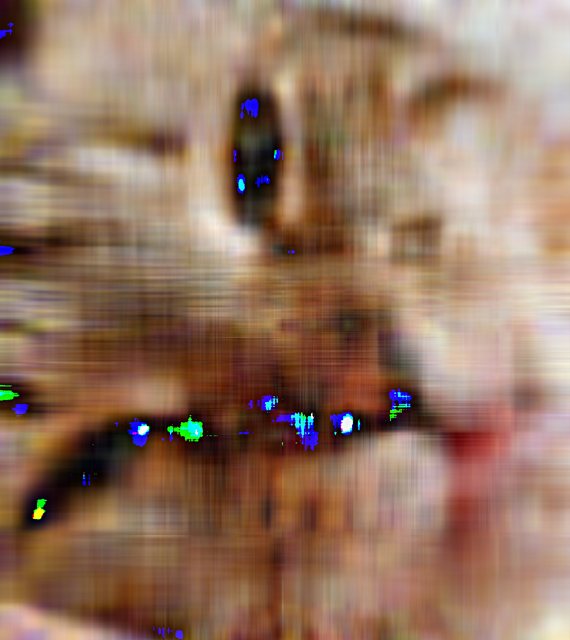

In [ ]:
r = int(input('Введите сингулярное значение >> '))
while r<0 or r > X.shape[1]:
  print('Введите корректное значение: от 1 до 1140')
  r = int(input('Введите сингулярное значение >> '))
print('***идёт прогрузка картинки***')
CAT = pict(Red,Green,Blue,r)
w,h = CAT.size
CAT = CAT.resize((w//2,h//2))
CAT